<a href="https://colab.research.google.com/github/Dhivyagkrishnan/QLSTM_for_stock_analysis/blob/main/QLSTM_for_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install utils
!pip install mxnet


In [12]:
import helper
import pandas as pd
from utils import *
import pandas as pd
import time
import numpy as np
import math

In [13]:
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

In [ ]:
!pip install numpy==1.23.5
import os
os.kill(os.getpid(), 9)  # 🔁 This force-restarts the runtime to apply numpy downgrade


In [1]:
!pip install mxnet


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Define only AAPL
ticker = 'AAPL'
company_name = 'APPLE'

# Date range: Last 5 years from today
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

# Download AAPL data
df = yf.download(ticker, start=start, end=end, auto_adjust=True)

# Add company metadata columns
df["Company"] = company_name
df["Ticker"] = ticker

# Reset index so Date becomes a normal column
df.reset_index(inplace=True)

# Save to CSV (Date will be a proper column)
df.to_csv("AAPL.csv", index=False)

# Optional: Show first few rows
df.head()




[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,Company,Ticker
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2020-06-29,87.918808,88.013588,85.367126,85.845870,130646000,APPLE,AAPL
1,2020-06-30,88.652687,88.939453,87.486207,87.505645,140223200,APPLE,AAPL
2,2020-07-01,88.485031,89.274837,88.436432,88.730481,110737200,APPLE,AAPL
3,2020-07-02,88.485031,90.030625,88.370820,89.393921,114041600,APPLE,AAPL
4,2020-07-06,90.851997,91.321019,89.884786,89.916380,118655600,APPLE,AAPL


In [15]:
dataset_ex_df = pd.read_csv('AAPL.csv', parse_dates=['Date'])
## Loads AAPL.csv into a DataFrame and converts the 'Date' column into proper datetime format.

In [16]:
# Ensure no rogue rows exist
df = yf.download('AAPL', period='5y', auto_adjust=True)
df.reset_index(inplace=True)
df["Ticker"] = "AAPL"
df.to_csv("AAPL.csv", index=False)


[*********************100%***********************]  1 of 1 completed


In [17]:
dataset_ex_df = pd.read_csv("AAPL.csv", parse_dates=["Date"])


In [18]:
dataset_ex_df.dropna(subset=['Date'], inplace=True)


In [19]:
dataset_ex_df[['Date', 'Close']].head()

,Date,Close
1,2020-06-29,87.91879272460938
2,2020-06-30,88.6526870727539
3,2020-07-01,88.48503875732422
4,2020-07-02,88.48503875732422
5,2020-07-06,90.85200500488281


In [8]:
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 1256 number of days in the dataset.


In [20]:
dataset_ex_df = pd.read_csv("AAPL.csv", parse_dates=["Date"])

# Drop any rows where 'Close' is not numeric (e.g., 'AAPL')
dataset_ex_df = dataset_ex_df[pd.to_numeric(dataset_ex_df["Close"], errors='coerce').notnull()]

# Now safely convert 'Close' to float
dataset_ex_df["Close"] = dataset_ex_df["Close"].astype(float)


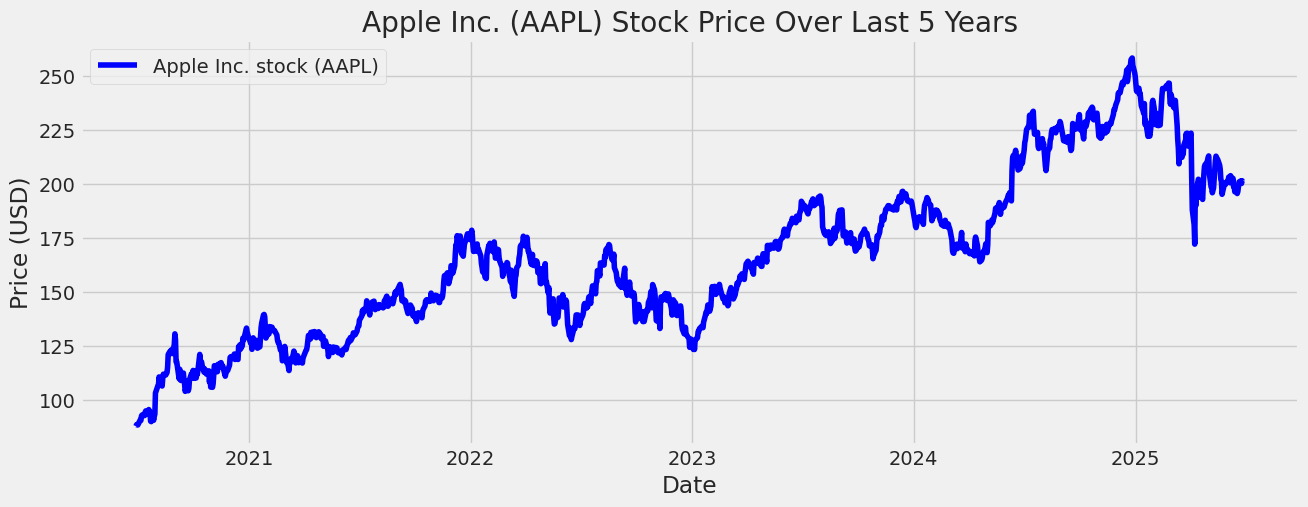

In [21]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['Close'], label='Apple Inc. stock (AAPL)', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Apple Inc. (AAPL) Stock Price Over Last 5 Years')
plt.legend()
plt.show()


In [22]:
# Ensure 'Close' column is numeric — drop non-numeric rows
dataset_ex_df = dataset_ex_df[pd.to_numeric(dataset_ex_df["Close"], errors="coerce").notnull()]
dataset_ex_df["Close"] = dataset_ex_df["Close"].astype(float)


In [23]:
df = dataset_ex_df.copy()

df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df["Momentum_10"] = df["Close"] - df["Close"].shift(10)

# RSI
delta = df["Close"].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df["RSI_14"] = 100 - (100 / (1 + rs))

# Final cleanup
dataset_TI_df = df[20:].reset_index(drop=True)
dataset_TI_df.head()


,Date,Close,High,Low,Open,Volume,Ticker,SMA_10,SMA_20,EMA_10,Momentum_10,RSI_14
0,2020-07-28,90.647873,91.90913313088771,90.64300783304508,91.73172785652534,103625600,AAPL,93.000520,92.160291,92.120192,-3.698723,43.755558
1,2020-07-29,92.385452,92.57014778095314,91.09503107606254,91.13148218567702,90329200,AAPL,92.739521,92.346929,92.168422,-2.609985,48.033129
2,2020-07-30,93.503326,93.60782206135195,91.14848849561243,91.55675572597188,158130000,AAPL,92.707200,92.597843,92.411132,-0.323212,50.707014
3,2020-07-31,103.292061,103.44273037041387,98.0088604443455,100.01132775994397,374336800,AAPL,93.672707,93.338194,94.389482,9.655075,68.770144
4,2020-08-03,105.894768,108.51935112132352,104.87895742584206,105.1778638999422,308151200,AAPL,94.701157,94.090332,96.481352,10.284492,69.919529


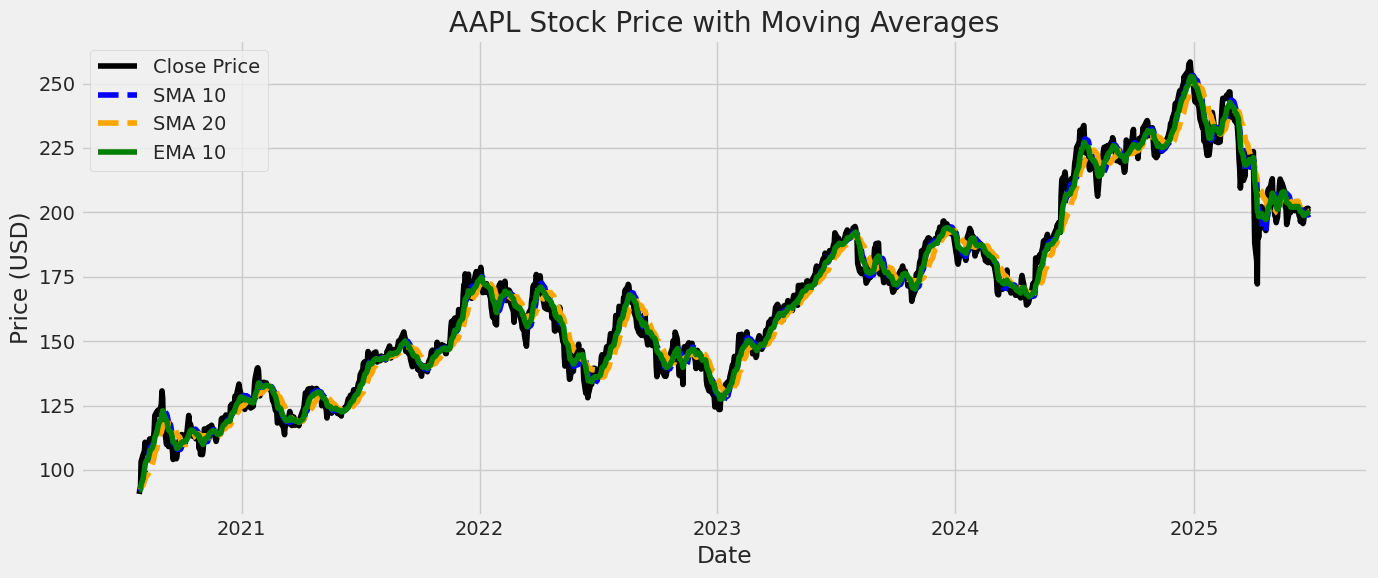

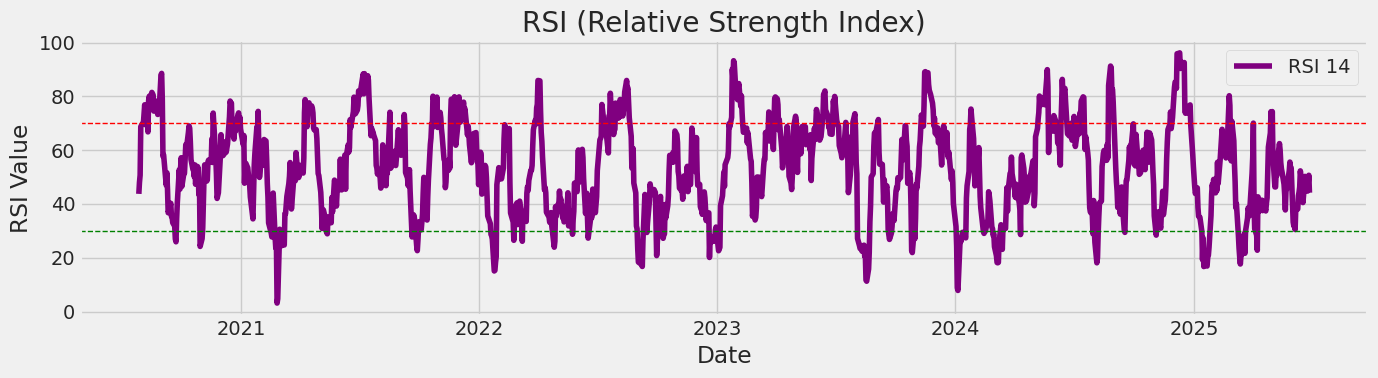

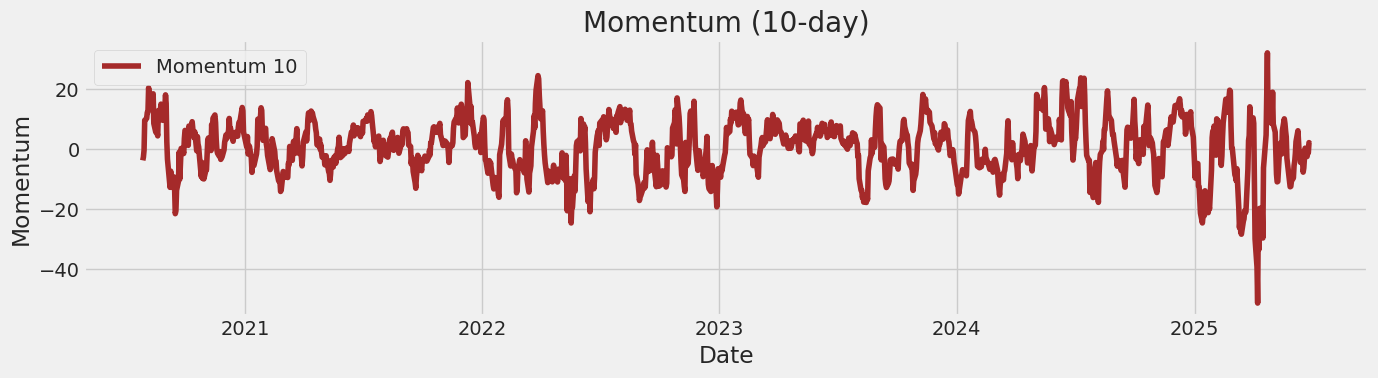

In [24]:
# Plot Close price with SMA and EMA
plt.figure(figsize=(14, 6))
plt.plot(dataset_TI_df['Date'], dataset_TI_df['Close'], label='Close Price', color='black')
plt.plot(dataset_TI_df['Date'], dataset_TI_df['SMA_10'], label='SMA 10', color='blue', linestyle='--')
plt.plot(dataset_TI_df['Date'], dataset_TI_df['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(dataset_TI_df['Date'], dataset_TI_df['EMA_10'], label='EMA 10', color='green')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(dataset_TI_df['Date'], dataset_TI_df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Momentum
plt.figure(figsize=(14, 4))
plt.plot(dataset_TI_df['Date'], dataset_TI_df['Momentum_10'], label='Momentum 10', color='brown')
plt.title('Momentum (10-day)')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


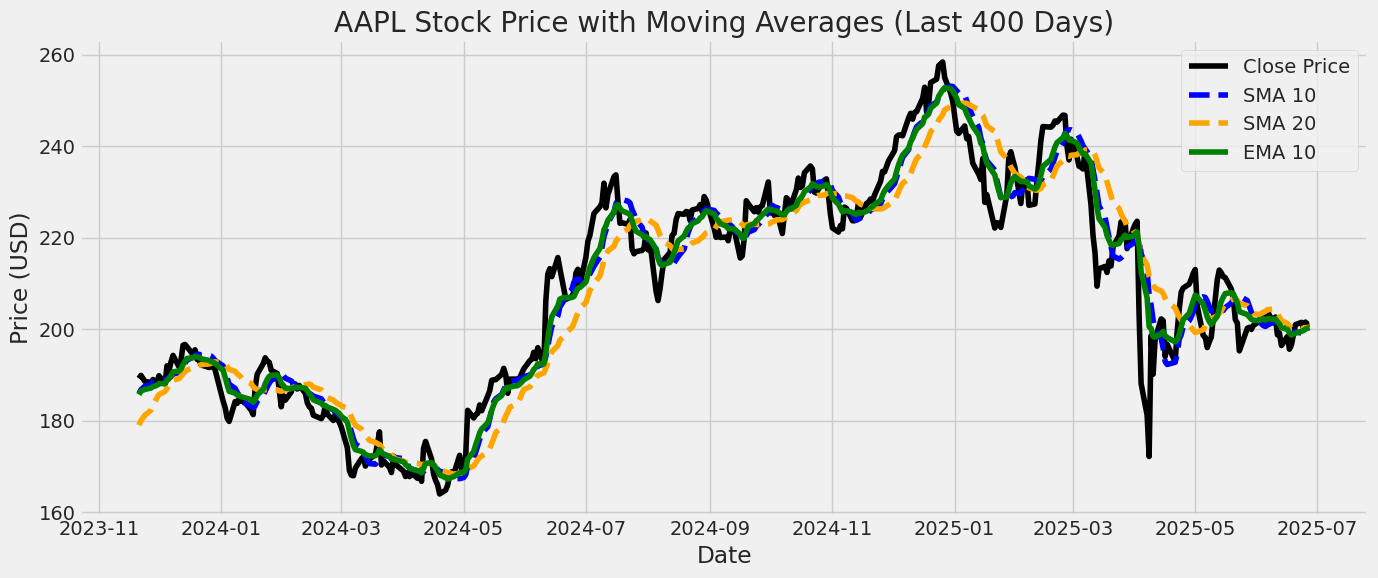

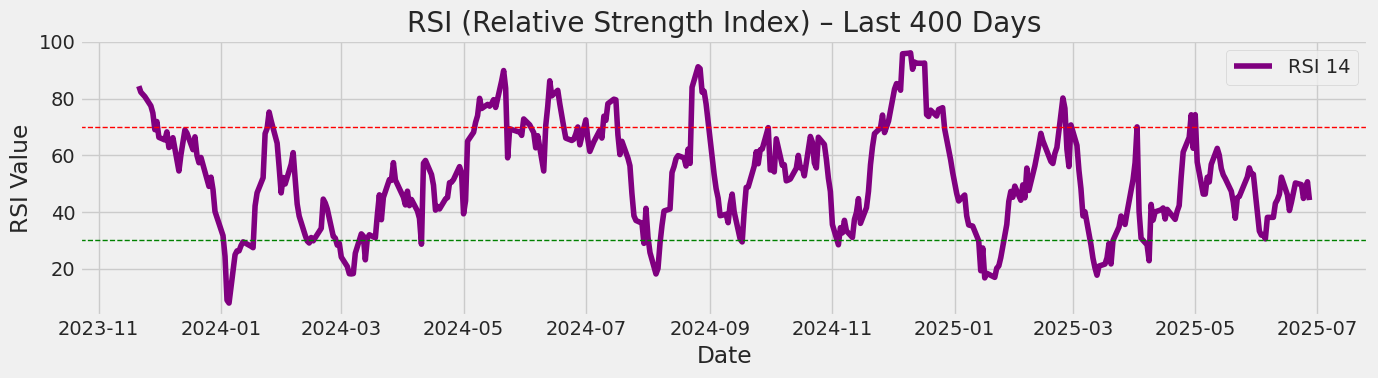

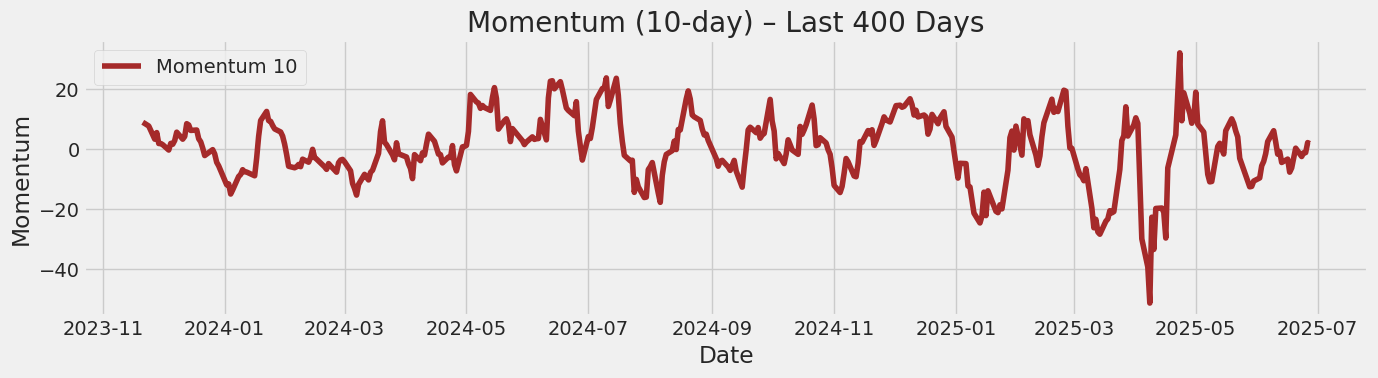

In [25]:
# Limit to the last 400 rows for better zoomed-in visualization
plot_df = dataset_TI_df[-400:]

# Plot Close price with SMA and EMA
plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Close'], label='Close Price', color='black')
plt.plot(plot_df['Date'], plot_df['SMA_10'], label='SMA 10', color='blue', linestyle='--')
plt.plot(plot_df['Date'], plot_df['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(plot_df['Date'], plot_df['EMA_10'], label='EMA 10', color='green')
plt.title('AAPL Stock Price with Moving Averages (Last 400 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(plot_df['Date'], plot_df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)
plt.title('RSI (Relative Strength Index) – Last 400 Days')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Momentum
plt.figure(figsize=(14, 4))
plt.plot(plot_df['Date'], plot_df['Momentum_10'], label='Momentum 10', color='brown')
plt.title('Momentum (10-day) – Last 400 Days')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**TREND APPROXIMATIONS (FOURIER TRANSFORMS)**

In [31]:
data_FT = dataset_ex_df[['Date', 'Close']]

In [32]:
close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


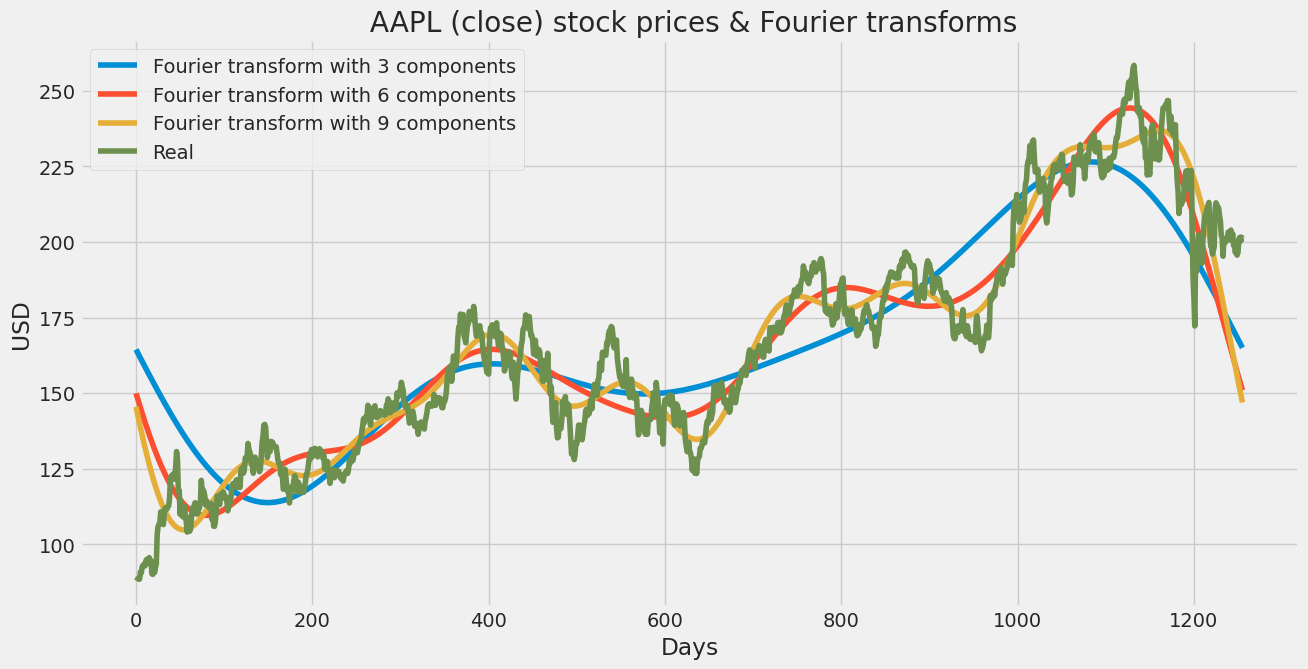

In [33]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title(' AAPL (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

**ARIMA MODEL**

In [75]:
from datetime import datetime



In [76]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from datetime import datetime  # ✅ Fixed import

series = data_FT['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
#model_fit = model.fit(disp=0)
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1256
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3172.963
Date:                Sun, 29 Jun 2025   AIC                           6357.927
Time:                        14:00:10   BIC                           6388.736
Sample:                             0   HQIC                          6369.507
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0123      0.017      0.728      0.467      -0.021       0.045
ar.L2          0.0252      0.023      1.088      0.276      -0.020       0.070
ar.L3         -0.0506      0.022     -2.301      0.0

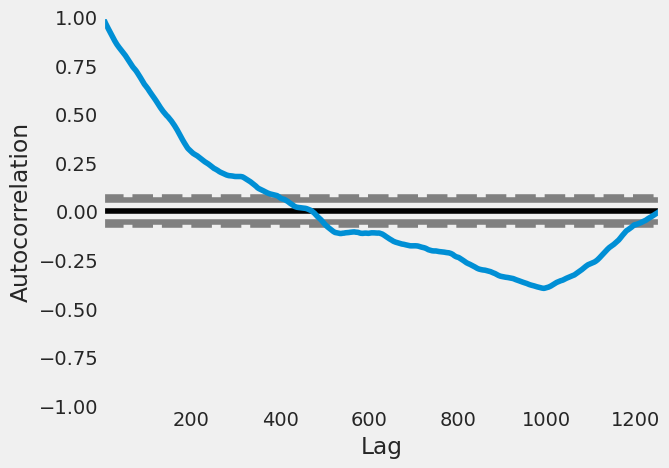

<Figure size 800x560 with 0 Axes>

In [47]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [74]:
 from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Load and clean the series
series = pd.read_csv("AAPL.csv", parse_dates=["Date"])["Close"]
series = pd.to_numeric(series, errors="coerce")
series = series.dropna()

# Convert to numpy array
X = series.values.astype(float)  # Ensure all values are numeric

# Train-test split
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# Initialize model inputs
history = [x for x in train]
predictions = []

# Rolling forecast
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(test[t])

# Evaluate
error = mean_squared_error(test, predictions)
print(f"Test MSE: {error:.3f}")


Test MSE: 13.321


In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Test RMSE: {rmse:.3f} USD")


Test RMSE: 3.650 USD


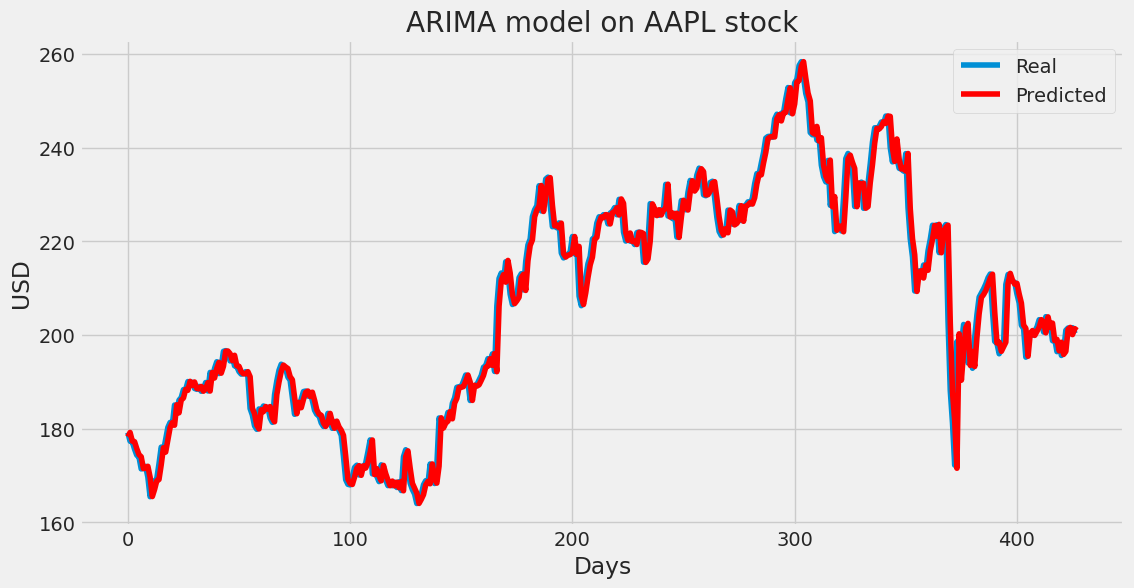

In [79]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on AAPL stock')
plt.legend()
plt.show()

CORRELATED ASSESTS OF APPLE


In [81]:

import yfinance as yf

SNP 500


In [84]:

SNP = yf.Ticker("^GSPC")

In [85]:

SNP_data = SNP.history(start="2020-06-29", end="2025-06-29")
SNP_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,3018.590088,3053.889893,2999.739990,3053.239990,4473970000,0.0,0.0
2020-06-30 00:00:00-04:00,3050.199951,3111.510010,3047.830078,3100.290039,4705850000,0.0,0.0
2020-07-01 00:00:00-04:00,3105.919922,3128.439941,3101.169922,3115.860107,4449230000,0.0,0.0
2020-07-02 00:00:00-04:00,3143.639893,3165.810059,3124.520020,3130.010010,4197720000,0.0,0.0
2020-07-06 00:00:00-04:00,3155.290039,3182.590088,3155.290039,3179.719971,4759160000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,0.0,0.0
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000,0.0,0.0
2025-06-25 00:00:00-04:00,6104.229980,6108.509766,6080.089844,6092.160156,5171110000,0.0,0.0


2 MSFT

In [88]:

MSFT = yf.Ticker("MSFT")

In [90]:

MSFT_data = MSFT.history(start="2020-06-29", end="2025-06-29")
MSFT_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,187.574002,190.208737,185.437475,190.122513,26701600,0.0,0.0
2020-06-30 00:00:00-04:00,189.585984,195.832691,189.451852,194.979996,34310300,0.0,0.0
2020-07-01 00:00:00-04:00,194.625536,197.700998,193.312964,196.120148,32061200,0.0,0.0
2020-07-02 00:00:00-04:00,197.059039,199.300971,196.407548,197.614731,29315800,0.0,0.0
2020-07-06 00:00:00-04:00,200.077022,202.280622,199.368033,201.868637,31897600,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,478.209991,487.750000,472.510010,486.000000,24864000,0.0,0.0
2025-06-24 00:00:00-04:00,488.950012,491.850006,486.799988,490.109985,22305600,0.0,0.0
2025-06-25 00:00:00-04:00,492.040009,494.559998,489.390015,492.269989,17495100,0.0,0.0


3. GOOGLE


In [91]:

GOOG = yf.Ticker("GOOG")

In [92]:
GOOG_data = GOOG.history(start="2020-06-29", end="2025-06-29")
GOOG_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,67.507726,69.367673,66.952532,69.336357,36204000,0.0,0.0
2020-06-30 00:00:00-04:00,69.111193,70.513358,68.789102,70.262840,40848000,0.0,0.0
2020-07-01 00:00:00-04:00,70.138086,71.723663,70.074462,71.477127,35504000,0.0,0.0
2020-07-02 00:00:00-04:00,71.919500,73.709360,71.893653,72.802254,37182000,0.0,0.0
2020-07-06 00:00:00-04:00,73.565709,74.884371,73.207836,74.343094,31280000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,167.320007,168.479996,163.330002,166.009995,36975600,0.0,0.0
2025-06-24 00:00:00-04:00,167.684998,169.250000,166.910004,167.740005,27310300,0.0,0.0
2025-06-25 00:00:00-04:00,168.649994,173.360001,168.561005,171.490005,23627400,0.0,0.0


3)QQQ

In [93]:
QQQ = yf.Ticker("QQQ")

In [94]:
QQQ_data = QQQ.history(start="2020-06-29", end="2025-06-29")
QQQ_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-06-29 00:00:00-04:00,233.021624,235.818237,230.477491,235.808517,34377800,0.000,0.0,0.0
2020-06-30 00:00:00-04:00,235.740561,240.974493,235.556061,240.430710,38909200,0.000,0.0,0.0
2020-07-01 00:00:00-04:00,240.469516,244.237174,239.925733,243.237000,34689200,0.000,0.0,0.0
2020-07-02 00:00:00-04:00,245.693756,246.907562,244.421690,244.887787,31956500,0.000,0.0,0.0
2020-07-06 00:00:00-04:00,248.053315,251.432546,248.033890,250.908203,34589000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,526.809998,532.169983,523.650024,531.650024,50666100,0.591,0.0,0.0
2025-06-24 00:00:00-04:00,536.890015,540.700012,536.270020,539.780029,45442000,0.000,0.0,0.0
2025-06-25 00:00:00-04:00,542.059998,543.309998,539.380005,541.159973,44804200,0.000,0.0,0.0


4)SPY

In [95]:
SPY = yf.Ticker("SPY")

In [96]:
SPY_data = SPY.history(start="2020-06-29", end="2025-06-29")
SPY_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-06-29 00:00:00-04:00,280.648321,283.627882,278.339138,283.488220,79773300,0.0,0.0,0.0
2020-06-30 00:00:00-04:00,283.050586,288.832850,282.892312,287.119568,113394800,0.0,0.0,0.0
2020-07-01 00:00:00-04:00,288.246223,290.406423,287.780664,289.130768,72396500,0.0,0.0,0.0
2020-07-02 00:00:00-04:00,292.594581,293.954034,290.052647,290.723053,69344200,0.0,0.0,0.0
2020-07-06 00:00:00-04:00,294.577845,295.797608,293.823642,295.210999,61713800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,595.039978,600.539978,591.890015,600.150024,87426000,0.0,0.0,0.0
2025-06-24 00:00:00-04:00,604.330017,607.849976,603.409973,606.780029,67735300,0.0,0.0,0.0
2025-06-25 00:00:00-04:00,607.909973,608.609985,605.539978,607.119995,62114800,0.0,0.0,0.0


5) AMZN

In [97]:
AMZN = yf.Ticker("AMZN")

In [98]:
AMZN_data = AMZN.history(start="2020-06-29", end="2025-06-29")
AMZN_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,134.500504,134.839996,131.503998,134.018997,84468000,0.0,0.0
2020-06-30 00:00:00-04:00,134.253494,138.481506,133.751495,137.940994,75394000,0.0,0.0
2020-07-01 00:00:00-04:00,137.899506,144.750000,137.699997,143.934998,127268000,0.0,0.0
2020-07-02 00:00:00-04:00,145.600494,147.778000,143.554993,144.514999,131868000,0.0,0.0
2020-07-06 00:00:00-04:00,146.748505,152.994003,146.500000,152.852005,137612000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,209.789993,210.389999,207.309998,208.470001,37311700,0.0,0.0
2025-06-24 00:00:00-04:00,212.139999,214.339996,211.050003,212.770004,38378800,0.0,0.0
2025-06-25 00:00:00-04:00,214.619995,216.029999,211.110001,211.990005,31755700,0.0,0.0


6)NVDA

In [99]:

NVDA = yf.Ticker("NVDA")

In [100]:
NVDA_data = NVDA.history(start="2020-06-29", end="2025-06-29")
NVDA_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,9.139625,9.174261,8.870760,9.169775,342248000,0.0,0.0
2020-06-30 00:00:00-04:00,9.283401,9.494953,9.236057,9.466547,367892000,0.0,0.0
2020-07-01 00:00:00-04:00,9.489467,9.544287,9.382072,9.498687,326648000,0.0,0.0
2020-07-02 00:00:00-04:00,9.607333,9.705510,9.546783,9.580671,364056000,0.0,0.0
2020-07-06 00:00:00-04:00,9.709745,9.876196,9.680591,9.806925,315892000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,142.500000,144.779999,142.029999,144.169998,154308900,0.0,0.0
2025-06-24 00:00:00-04:00,145.559998,147.960007,145.500000,147.899994,187566100,0.0,0.0
2025-06-25 00:00:00-04:00,149.270004,154.449997,149.259995,154.309998,269146500,0.0,0.0


6)TSLA

In [101]:

TSLA = yf.Ticker("TSLA")

In [102]:
TSLA_data = TSLA.history(start="2020-06-29", end="2025-06-29")
TSLA_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,64.600670,67.333336,63.234669,67.290001,135396000,0.0,0.0
2020-06-30 00:00:00-04:00,67.099998,72.512665,66.915337,71.987335,253777500,0.0,0.0
2020-07-01 00:00:00-04:00,72.199997,75.688667,72.033333,74.641998,199903500,0.0,0.0
2020-07-02 00:00:00-04:00,81.431999,81.866669,79.040001,80.577332,258751500,0.0,0.0
2020-07-06 00:00:00-04:00,85.112663,91.852669,84.402664,91.438667,308548500,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,327.540009,357.540009,327.480011,348.679993,190716800,0.0,0.0
2025-06-24 00:00:00-04:00,356.170013,356.260010,340.440002,340.470001,114736200,0.0,0.0
2025-06-25 00:00:00-04:00,342.700012,343.000000,320.399994,327.549988,119845100,0.0,0.0


7)META

In [104]:

META = yf.Ticker("META")

In [105]:
META_data = META.history(start="2020-06-29", end="2025-06-29")
META_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,208.605575,219.545558,205.979980,219.436157,58514300,0.0,0.0
2020-06-30 00:00:00-04:00,219.386415,226.258716,217.277987,225.831070,33927100,0.0,0.0
2020-07-01 00:00:00-04:00,227.253266,237.695977,226.318393,236.253891,43399700,0.0,0.0
2020-07-02 00:00:00-04:00,237.695980,238.690524,231.340845,232.146423,30633600,0.0,0.0
2020-07-06 00:00:00-04:00,232.484564,239.088335,231.002703,238.968994,26206200,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,683.690002,699.049988,678.750000,698.530029,11080100,0.0,0.0
2025-06-24 00:00:00-04:00,704.890015,713.190002,702.109985,712.200012,13823200,0.0,0.0
2025-06-25 00:00:00-04:00,713.320007,716.580017,705.380005,708.679993,9320400,0.0,0.0


8)INTC

In [106]:
INTC = yf.Ticker("INTC")

In [107]:
INTC_data = INTC.history(start="2020-06-29", end="2025-06-29")
INTC_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,51.231236,52.015703,50.598308,51.944389,22150300,0.0,0.0
2020-06-30 00:00:00-04:00,52.336622,53.468755,52.185079,53.335041,31542100,0.0,0.0
2020-07-01 00:00:00-04:00,53.406352,53.513324,52.381191,52.425766,14748100,0.0,0.0
2020-07-02 00:00:00-04:00,52.764521,53.317218,52.568406,52.711037,15578600,0.0,0.0
2020-07-06 00:00:00-04:00,52.345544,53.147840,52.238568,53.076527,20536700,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,21.070000,21.580000,20.730000,21.190001,81461000,0.0,0.0
2025-06-24 00:00:00-04:00,21.340000,22.690001,21.330000,22.549999,130368700,0.0,0.0
2025-06-25 00:00:00-04:00,22.580000,22.770000,22.129999,22.200001,64975100,0.0,0.0


9)ADBE

In [108]:

ADBE = yf.Ticker("ADBE")

In [109]:
ADBE_data = ADBE.history(start="2020-06-29", end="2025-06-29")
ADBE_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,427.109985,428.480011,416.029999,424.200012,2623900,0.0,0.0
2020-06-30 00:00:00-04:00,426.679993,436.910004,423.859985,435.309998,2944700,0.0,0.0
2020-07-01 00:00:00-04:00,434.799988,442.049988,433.619995,439.809998,2581700,0.0,0.0
2020-07-02 00:00:00-04:00,445.000000,448.160004,441.359985,442.950012,2503000,0.0,0.0
2020-07-06 00:00:00-04:00,448.000000,455.529999,444.690002,452.589996,2761200,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,377.589996,380.209991,374.239990,380.119995,3841800,0.0,0.0
2025-06-24 00:00:00-04:00,384.959991,385.000000,378.510010,382.339996,4797100,0.0,0.0
2025-06-25 00:00:00-04:00,383.600006,388.049988,382.000000,387.549988,3718800,0.0,0.0


10)NYSE

In [112]:

NYSE = yf.Ticker("^NYA")

In [113]:
NYSE_data = NYSE.history(start="2020-06-29", end="2025-06-29")
NYSE_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,11683.070312,11777.639648,11605.469727,11777.080078,4473970000,0.0,0.0
2020-06-30 00:00:00-04:00,11736.750000,11934.959961,11724.570312,11893.780273,4705850000,0.0,0.0
2020-07-01 00:00:00-04:00,11907.830078,11982.230469,11858.820312,11901.549805,4449230000,0.0,0.0
2020-07-02 00:00:00-04:00,12088.700195,12138.830078,11970.799805,11991.519531,4197720000,0.0,0.0
2020-07-06 00:00:00-04:00,12181.290039,12218.190430,12114.320312,12160.009766,4759160000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,19868.359375,20017.109375,19765.419922,20008.179688,5597000000,0.0,0.0
2025-06-24 00:00:00-04:00,20008.179688,20262.199219,20008.179688,20217.339844,5443690000,0.0,0.0
2025-06-25 00:00:00-04:00,20217.339844,20217.339844,20083.140625,20087.449219,5171110000,0.0,0.0


13) NASDAQ

In [115]:

NASDAQ = yf.Ticker("^IXIC")

In [116]:
NASDAQ _data = NASDAQ.history(start="2020-06-29", end="2025-06-29")
NASDAQ_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-29 00:00:00-04:00,9771.719727,9877.339844,9663.610352,9874.150391,4336290000,0.0,0.0
2020-06-30 00:00:00-04:00,9875.290039,10085.589844,9863.669922,10058.769531,4510190000,0.0,0.0
2020-07-01 00:00:00-04:00,10063.669922,10197.190430,10048.040039,10154.629883,4624430000,0.0,0.0
2020-07-02 00:00:00-04:00,10268.669922,10310.360352,10194.059570,10207.629883,4038920000,0.0,0.0
2020-07-06 00:00:00-04:00,10360.379883,10462.049805,10354.980469,10433.650391,4570260000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,0.0,0.0
2025-06-25 00:00:00-04:00,20013.949219,20052.779297,19918.080078,19973.550781,8256120000,0.0,0.0


COMBINING all the data

In [124]:
dataset_total = dataset_ex_df
dataset_total

,Date,Close,High,Low,Open,Volume,Ticker
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL
...,...,...,...,...,...,...,...
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL
1255,2025-06-26,201.000000,202.63999938964844,199.4600067138672,201.42999267578125,50799100,AAPL


Trend approximations

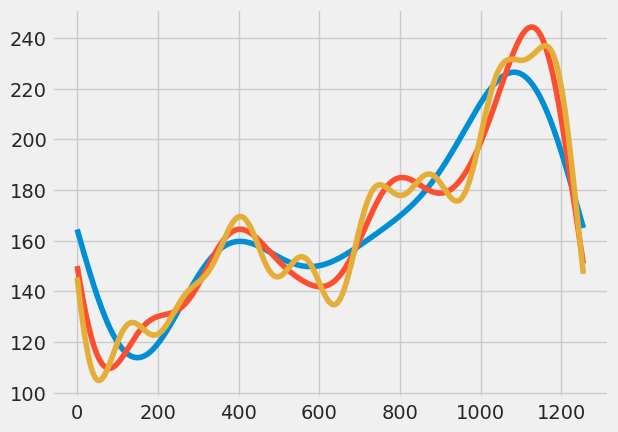

In [125]:
for num_ in [3, 6, 9]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

In [126]:

fft_list_3 = np.copy(fft_list); fft_list_3[3:-3]=0
dataset_total['FT3'] = np.fft.ifft(fft_list_3).real

In [127]:

fft_list_6 = np.copy(fft_list); fft_list_6[6:-6]=0
dataset_total['FT6'] = np.fft.ifft(fft_list_6).real

In [128]:
fft_list_9 = np.copy(fft_list); fft_list_9[9:-9]=0
dataset_total['FT9'] = np.fft.ifft(fft_list_9).real



In [129]:

dataset_total

,Date,Close,High,Low,Open,Volume,Ticker,FT3,FT6,FT9
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL,164.406568,149.935408,145.477595
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL,163.840928,148.959016,144.074346
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL,163.275905,147.990596,142.686206
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL,162.711560,147.030407,141.314007
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL,162.147954,146.078704,139.958564
...,...,...,...,...,...,...,...,...,...,...
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL,167.241837,154.927598,152.690407
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL,166.674047,153.915371,151.224562
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL,166.106563,152.909762,149.769469
1255,2025-06-26,201.000000,202.63999938964844,199.4600067138672,201.42999267578125,50799100,AAPL,165.539447,151.911050,148.326023


ARIMA ( We put the true data for the training values, and the predictions for the test values.)

In [130]:
training_predictions = np.concatenate((train, np.array(predictions)))

In [131]:
dataset_total['ARIMA'] = training_predictions

In [132]:

dataset_total

,Date,Close,High,Low,Open,Volume,Ticker,FT3,FT6,FT9,ARIMA
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL,164.406568,149.935408,145.477595,87.918793
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL,163.840928,148.959016,144.074346,88.652687
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL,163.275905,147.990596,142.686206,88.485039
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL,162.711560,147.030407,141.314007,88.485039
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL,162.147954,146.078704,139.958564,90.852005
...,...,...,...,...,...,...,...,...,...,...,...
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL,167.241837,154.927598,152.690407,201.202717
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL,166.674047,153.915371,151.224562,201.628095
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL,166.106563,152.909762,149.769469,200.088599
1255,2025-06-26,201.000000,202.63999938964844,199.4600067138672,201.42999267578125,50799100,AAPL,165.539447,151.911050,148.326023,201.363572


CORRELATED ASSESTS (We put in the closing data for the correlated assets.)

In [134]:
dataset_total['SNP'] = list(SNP_data['Close'])
dataset_total['MSFT'] = list(MSFT_data['Close'])
dataset_total['GOOG'] = list(GOOG_data['Close'])
dataset_total['QQQ'] = list(QQQ_data['Close'])
dataset_total['SPY'] = list(SPY_data['Close'])
dataset_total['AMZN'] = list(AMZN_data['Close'])
dataset_total['NVDA'] = list(NVDA_data['Close'])
dataset_total['TSLA'] = list(TSLA_data['Close'])
dataset_total['META'] = list(META_data['Close'])
dataset_total['INTC'] = list(INTC_data['Close'])
dataset_total['ADBE'] = list(ADBE_data['Close'])
dataset_total['NYSE'] = list(NYSE_data['Close'])
dataset_total['NASDAQ'] = list(NASDAQ_data['Close'])

In [135]:

dataset_total

,Date,Close,High,Low,Open,Volume,Ticker,FT3,FT6,FT9,...,QQQ,SPY,AMZN,NVDA,TSLA,META,INTC,ADBE,NYSE,NASDAQ
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL,164.406568,149.935408,145.477595,...,235.808517,283.488220,134.018997,9.169775,67.290001,219.436157,51.944389,424.200012,11777.080078,9874.150391
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL,163.840928,148.959016,144.074346,...,240.430710,287.119568,137.940994,9.466547,71.987335,225.831070,53.335041,435.309998,11893.780273,10058.769531
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL,163.275905,147.990596,142.686206,...,243.237000,289.130768,143.934998,9.498687,74.641998,236.253891,52.425766,439.809998,11901.549805,10154.629883
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL,162.711560,147.030407,141.314007,...,244.887787,290.723053,144.514999,9.580671,80.577332,232.146423,52.711037,442.950012,11991.519531,10207.629883
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL,162.147954,146.078704,139.958564,...,250.908203,295.210999,152.852005,9.806925,91.438667,238.968994,53.076527,452.589996,12160.009766,10433.650391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL,167.241837,154.927598,152.690407,...,531.650024,600.150024,208.470001,144.169998,348.679993,698.530029,21.190001,380.119995,20008.179688,19630.970703
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL,166.674047,153.915371,151.224562,...,539.780029,606.780029,212.770004,147.899994,340.470001,712.200012,22.549999,382.339996,20217.339844,19912.529297
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL,166.106563,152.909762,149.769469,...,541.159973,607.119995,211.990005,154.309998,327.549988,708.679993,22.200001,387.549988,20087.449219,19973.550781
1255,2025-06-26,201.000000,202.63999938964844,199.4600067138672,201.42999267578125,50799100,AAPL,165.539447,151.911050,148.326023,...,546.219971,611.869995,217.119995,155.020004,325.779999,726.090027,22.500000,384.950012,20256.199219,20167.910156



Pruning the data
Now, we remove all the useless columns and rows. We remove any other AAPL data other than the closing price, and we shift the values of the closing prices up by 1 (since that's the value we want to predict, the next day's data). Furthermore, we remove any row with null values, which is only the days that do not have the moving averages (for obvious reasons), and the day we shifted up from.

In [136]:

dataset_total.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'FT3',
       'FT6', 'FT9', 'ARIMA', 'SNP', 'MSFT', 'GOOG', 'QQQ', 'SPY', 'AMZN',
       'NVDA', 'TSLA', 'META', 'INTC', 'ADBE', 'NYSE', 'NASDAQ'],
      dtype='object')

In [143]:
dataset_total_df = dataset_total[[ 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'FT3',
       'FT6', 'FT9', 'ARIMA', 'SNP', 'MSFT', 'GOOG', 'QQQ', 'SPY', 'AMZN',
       'NVDA', 'TSLA', 'META', 'INTC', 'ADBE', 'NYSE', 'NASDAQ']]

In [144]:

is_NaN = dataset_total_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
dataset_total_df_clean = dataset_total_df[-row_has_NaN]

In [145]:

dataset_total_df_clean

,Date,Close,High,Low,Open,Volume,Ticker,FT3,FT6,FT9,...,QQQ,SPY,AMZN,NVDA,TSLA,META,INTC,ADBE,NYSE,NASDAQ
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL,164.406568,149.935408,145.477595,...,235.808517,283.488220,134.018997,9.169775,67.290001,219.436157,51.944389,424.200012,11777.080078,9874.150391
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL,163.840928,148.959016,144.074346,...,240.430710,287.119568,137.940994,9.466547,71.987335,225.831070,53.335041,435.309998,11893.780273,10058.769531
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL,163.275905,147.990596,142.686206,...,243.237000,289.130768,143.934998,9.498687,74.641998,236.253891,52.425766,439.809998,11901.549805,10154.629883
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL,162.711560,147.030407,141.314007,...,244.887787,290.723053,144.514999,9.580671,80.577332,232.146423,52.711037,442.950012,11991.519531,10207.629883
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL,162.147954,146.078704,139.958564,...,250.908203,295.210999,152.852005,9.806925,91.438667,238.968994,53.076527,452.589996,12160.009766,10433.650391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL,167.241837,154.927598,152.690407,...,531.650024,600.150024,208.470001,144.169998,348.679993,698.530029,21.190001,380.119995,20008.179688,19630.970703
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL,166.674047,153.915371,151.224562,...,539.780029,606.780029,212.770004,147.899994,340.470001,712.200012,22.549999,382.339996,20217.339844,19912.529297
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL,166.106563,152.909762,149.769469,...,541.159973,607.119995,211.990005,154.309998,327.549988,708.679993,22.200001,387.549988,20087.449219,19973.550781
1255,2025-06-26,201.000000,202.63999938964844,199.4600067138672,201.42999267578125,50799100,AAPL,165.539447,151.911050,148.326023,...,546.219971,611.869995,217.119995,155.020004,325.779999,726.090027,22.500000,384.950012,20256.199219,20167.910156


In [146]:
target_sensor = "Close"
features = list(dataset_total_df_clean.columns.difference([target_sensor]))

forecast_lead = 1
target = f"{target_sensor}_lead{forecast_lead}"

dataset_total_df_clean[target] = dataset_total_df_clean[target_sensor].shift(-forecast_lead)
dataset_total_df_clean = dataset_total_df_clean.iloc[:-forecast_lead]

This is the final dataset that we use , and the features it contains

In [147]:

dataset_total_df_clean

,Date,Close,High,Low,Open,Volume,Ticker,FT3,FT6,FT9,...,SPY,AMZN,NVDA,TSLA,META,INTC,ADBE,NYSE,NASDAQ,Close_lead1
1,2020-06-29,87.918793,88.01357302520984,85.3671112421525,85.84585558837018,130646000,AAPL,164.406568,149.935408,145.477595,...,283.488220,134.018997,9.169775,67.290001,219.436157,51.944389,424.200012,11777.080078,9874.150391,88.652687
2,2020-06-30,88.652687,88.93945305521017,87.48620727559833,87.50564539182193,140223200,AAPL,163.840928,148.959016,144.074346,...,287.119568,137.940994,9.466547,71.987335,225.831070,53.335041,435.309998,11893.780273,10058.769531,88.485039
3,2020-07-01,88.485039,89.27484510027205,88.43643973984622,88.73048864019495,110737200,AAPL,163.275905,147.990596,142.686206,...,289.130768,143.934998,9.498687,74.641998,236.253891,52.425766,439.809998,11901.549805,10154.629883,88.485039
4,2020-07-02,88.485039,90.03063287261533,88.37082772891567,89.39392863813931,114041600,AAPL,162.711560,147.030407,141.314007,...,290.723053,144.514999,9.580671,80.577332,232.146423,52.711037,442.950012,11991.519531,10207.629883,90.852005
5,2020-07-06,90.852005,91.32102654126581,89.88479363094679,89.91638706165726,118655600,AAPL,162.147954,146.078704,139.958564,...,295.210999,152.852005,9.806925,91.438667,238.968994,53.076527,452.589996,12160.009766,10433.650391,90.570107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-06-20,201.000000,201.6999969482422,196.86000061035156,198.24000549316406,96813500,AAPL,167.809872,155.946161,154.166099,...,594.280029,209.690002,143.850006,322.160004,682.349976,21.080000,376.920013,19868.359375,19447.410156,201.500000
1252,2025-06-23,201.500000,202.3000030517578,198.9600067138672,201.6300048828125,55814300,AAPL,167.241837,154.927598,152.690407,...,600.150024,208.470001,144.169998,348.679993,698.530029,21.190001,380.119995,20008.179688,19630.970703,200.300003
1253,2025-06-24,200.300003,203.44000244140625,200.1999969482422,202.58999633789062,54064000,AAPL,166.674047,153.915371,151.224562,...,606.780029,212.770004,147.899994,340.470001,712.200012,22.549999,382.339996,20217.339844,19912.529297,201.559998
1254,2025-06-25,201.559998,203.6699981689453,200.6199951171875,201.4499969482422,39525700,AAPL,166.106563,152.909762,149.769469,...,607.119995,211.990005,154.309998,327.549988,708.679993,22.200001,387.549988,20087.449219,19973.550781,201.000000


In [148]:

features = list(dataset_total_df_clean.columns.difference([target_sensor, 'Close_lead1', 'Date']))
features

['ADBE',
 'AMZN',
 'ARIMA',
 'FT3',
 'FT6',
 'FT9',
 'GOOG',
 'High',
 'INTC',
 'Low',
 'META',
 'MSFT',
 'NASDAQ',
 'NVDA',
 'NYSE',
 'Open',
 'QQQ',
 'SNP',
 'SPY',
 'TSLA',
 'Ticker',
 'Volume']

In [151]:

dataset_total_df_clean.to_csv('dataset_AAPL_prediction.csv')